# Zadania do wykonania

*   Wczytaj zbiór Wine Quality (https://raw.githubusercontent.com/aniku10/dataMining/master/winequality-red.csv) - (; separated)
*   Zapoznaj się ze zbiorem, jakie cechy opisują wino.
*   Dokonaj preprocessingu:
  *   usuń niepotrzebne kolumny - jeśli uważasz, że takie znajdują się w zbiorze
  *   uzupełnij puste wartości - jeśli takie znajdują się w zbiorze
  *   obsłuż wartości odstające - jeśli takie znajdują się w zbiorze



*  Odpowiedz na pytania:
  *   które składniki są najbardziej powiązane z jakością wina?
  *   czy istnieją jakieś zależności między składnikami?

* Zaproponuj listę cech, które powinny wziąć udział w klasyfikacji win 



In [2]:
import pandas as pd
wina = pd.read_csv("https://raw.githubusercontent.com/aniku10/dataMining/master/winequality-red.csv",sep=';')

In [3]:
wina.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wina.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


pH wydaje się mieć mały wpływ na jakość wina, a jego wartość minimalna i maksymalna charakteryzuje się małą rozpiętością, dlatego kolumna zostanie usunięta z dalszych analiz

In [6]:
wina.drop(['pH'],axis=1, inplace=True)

In [7]:
wina.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wina.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
duplicated=wina[wina.duplicated()]
duplicated
wina.drop_duplicates(keep='first', inplace = True)

In [10]:
wina.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,0.56,9.4,5


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

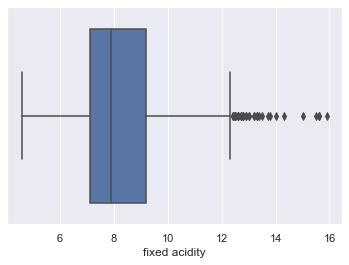

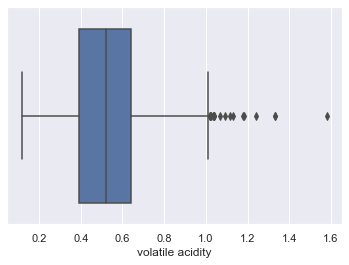

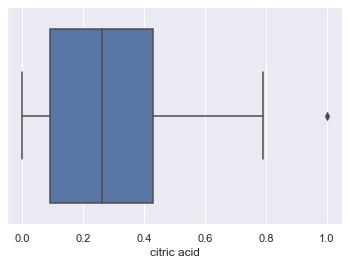

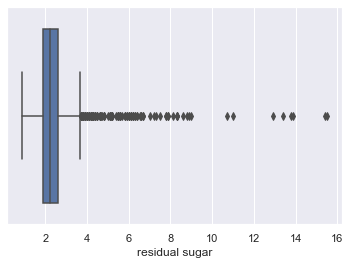

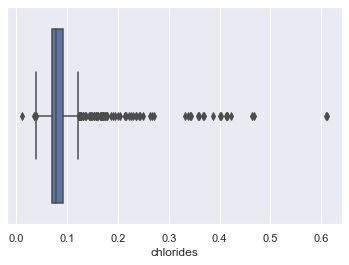

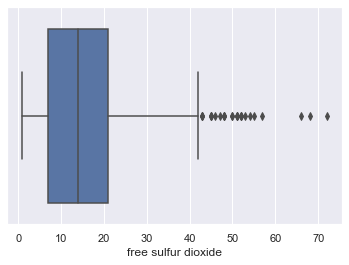

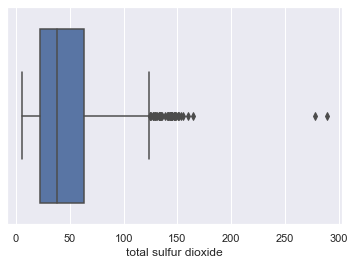

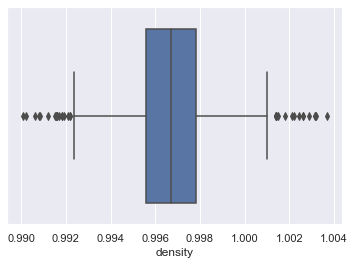

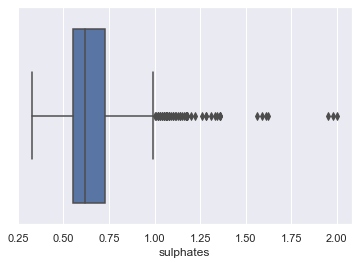

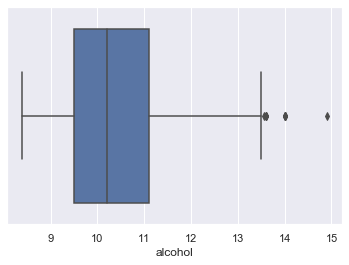

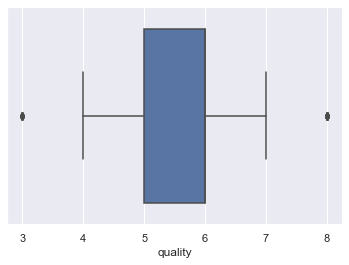

In [12]:
columns=wina.columns

for i in range(0,len(columns)):
    sns.boxplot(x=wina[columns[i]])
    plt.show()

In [13]:
q1 = wina.quantile(0.25)
q3 = wina.quantile(0.75)

diff_q = q3-q1
diff_q

fixed acidity            2.10000
volatile acidity         0.25000
citric acid              0.34000
residual sugar           0.70000
chlorides                0.02100
free sulfur dioxide     14.00000
total sulfur dioxide    41.00000
density                  0.00222
sulphates                0.18000
alcohol                  1.60000
quality                  1.00000
dtype: float64

In [14]:
outliers = (wina<(q1-3.0*diff_q)) | (wina>(q3+3.0*diff_q))

no_outliers = ~(outliers).any(axis=1)
no_outliers.value_counts()

True     1222
False     137
dtype: int64

In [15]:
wina._update_inplace(wina[no_outliers])

In [16]:
wina

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,5


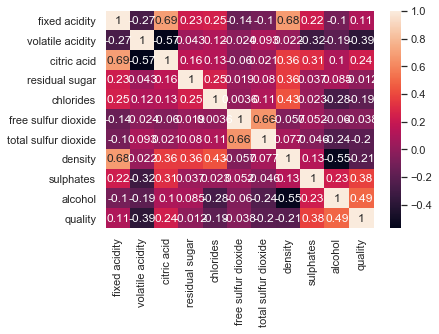

In [17]:
corr = wina.corr()
sns.heatmap(corr, annot=True)

Silną zależność widać pomiędzy zawartością alkoholu a gęstością, kwasowością a kwasem cytrynowym i wolnym dwutlenkiem siarki a całkowitym dwutlenkiem siarki

In [41]:
import sklearn.feature_selection as fs

x = wina.drop(columns = "quality")
y = wina.loc[:, "quality"]

fmutual = fs.mutual_info_classif(x, y, n_neighbors=3)
mutuals = pd.DataFrame({'MI': fmutual}, index = x.columns)

In [42]:
mutuals.sort_values

<bound method DataFrame.sort_values of                             MI
fixed acidity         0.028965
volatile acidity      0.080832
citric acid           0.049888
residual sugar        0.000000
chlorides             0.027709
free sulfur dioxide   0.021132
total sulfur dioxide  0.051182
density               0.040842
sulphates             0.115526
alcohol               0.180022>

Z jakością wina najbardziej powiązane są zawartść siarczanów i alkoholu 

Cechami, które powinny być brane pod uwagę podczas klasyfikacji są stała kwasowość, kwas cytrynowy, gęstość, lotna kwasowość,
wolny i całkowity dwutlenek siarki i zawartość alkoholu.

In [43]:
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score

In [44]:
x = preprocessing.normalize(x)
x

array([[0.195994  , 0.01853997, 0.        , ..., 0.02642741, 0.01483198,
        0.24896535],
       [0.10734519, 0.01211074, 0.        , ..., 0.01371816, 0.0093583 ,
        0.13486959],
       [0.13567425, 0.01321954, 0.00069577, ..., 0.01734195, 0.01130619,
        0.17046252],
       ...,
       [0.09008973, 0.0083982 , 0.00152694, ..., 0.01519493, 0.01160478,
        0.1710178 ],
       [0.10588551, 0.01157562, 0.0021536 , ..., 0.0178654 , 0.01274215,
        0.1830563 ],
       [0.1262191 , 0.00652132, 0.00988716, ..., 0.02094164, 0.0138841 ,
        0.23140168]])

In [45]:
y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1222, dtype: int64

In [46]:
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=5)

print("Zbiór treningowy:", train_X.shape, train_y.shape)
print("Zbiór testowy:", test_X.shape, test_y.shape)

Zbiór treningowy: (916, 10) (916,)
Zbiór testowy: (306, 10) (306,)


In [47]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
predicted_y = knn.predict(test_X)
predicted_y

array([5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 7, 6, 6, 6, 6, 7, 6, 6,
       5, 5, 4, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6,
       7, 5, 7, 5, 7, 5, 6, 5, 4, 5, 5, 6, 5, 6, 5, 5, 6, 5, 7, 5, 6, 5,
       5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 7, 5, 5, 5, 5, 5, 6, 6, 7, 6,
       6, 5, 5, 7, 7, 5, 6, 5, 7, 5, 6, 6, 5, 7, 5, 6, 5, 6, 5, 6, 7, 5,
       6, 6, 6, 6, 5, 7, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6,
       5, 7, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6,
       5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6,
       5, 6, 5, 6, 6, 5, 5, 5, 7, 8, 7, 5, 5, 5, 4, 6, 7, 5, 6, 4, 6, 5,
       6, 6, 7, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5,
       7, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6,
       6, 5, 5, 5, 4, 7, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 4,
       5, 5, 5, 5, 5, 5, 7, 7, 6, 6, 6, 5, 5, 6, 7, 5, 6, 5, 6, 5, 5, 5,
       5, 4, 6, 5, 5, 6, 6, 6, 6, 6, 7, 5, 6, 6, 6,

In [49]:
from sklearn import metrics

prediction=knn.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.4803921568627451


In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [55]:
def knn_comparison(data, selected_feature_pair, k):
    x = data[selected_feature_pair].values

    encoder = LabelEncoder()
    y = encoder.fit_transform(wina['quality'])

    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(x, y)

    # Wizualizacja regionów decyzyjnych
    plot_decision_regions(x, y, clf=model, legend=2)
  
    # Oznaczenie osi
    plt.xlabel(selected_feature_pair[0])
    plt.ylabel(selected_feature_pair[1])
    plt.title('KNN dla k='+ str(k))
    plt.show()

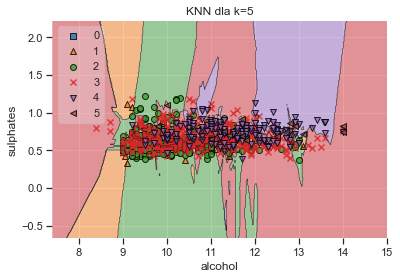

In [58]:
knn_comparison(wina, ['alcohol', 'sulphates'], 5)

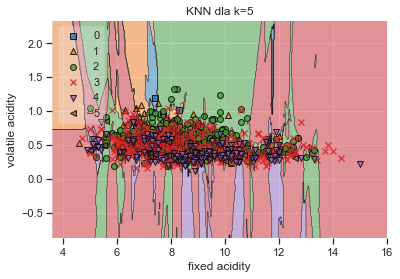

In [59]:
knn_comparison(wina, ['fixed acidity', 'volatile acidity'], 5)

In [71]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

num_folds = 10
num_instances = len(wina.columns)
seed = 7
kfold = KFold(n_splits=num_instances,random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

C:\Users\kkorsak\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.5384637884637885


Dla modelu KNN dokładność wynosi 0,48, zaś dla modelu drzew decyzyjnych z ilością drzew równą 100 dokładność wynosi 0,54